In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling as pp
import sweetviz as sv
import seaborn as sns

In [2]:
data = pd.read_csv("C:\\Users\\prasa\\Downloads\\Salary_Data.csv")

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
data.shape # No of rows and columns

(30, 2)

In [7]:
data[data.duplicated()].shape #Count of duplicate values 

(0, 2)

In [ ]:
#there are no duplicate values

<AxesSubplot:>

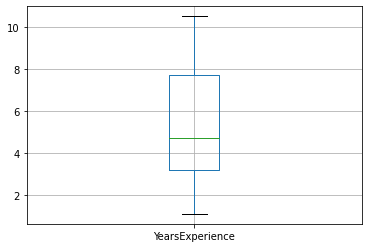

In [14]:
#Outlier Detection
data.boxplot('YearsExperience')

<AxesSubplot:>

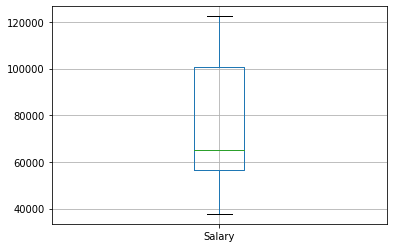

In [15]:
data.boxplot('Salary')

In [ ]:
# in both the columns there is no outliers. but both have positive skewness

<AxesSubplot:>

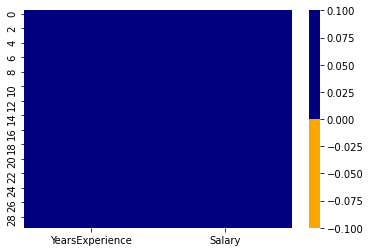

In [18]:
#Checking Missing Values
cols = data.columns
colours = ['#FFA500', '#000080']
sns.heatmap(data[cols].isnull(),
            cmap=sns.color_palette(colours))  # there are no missing value according to plot

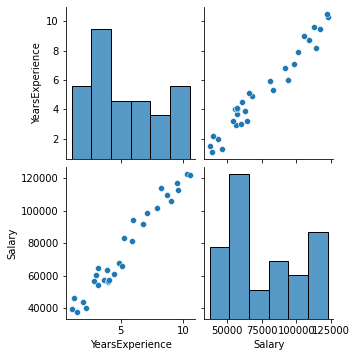

In [19]:
sns.pairplot(data) #default pairplot for the data

In [20]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [ ]:
#Model Building

In [21]:
import statsmodels.formula.api as smf
model= smf.ols('Salary~YearsExperience', data=data).fit()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

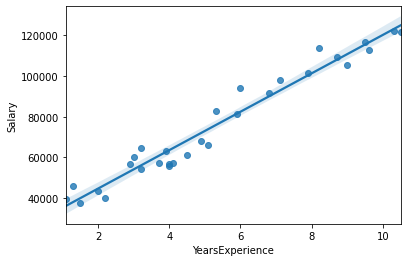

In [24]:
sns.regplot(x='YearsExperience', y='Salary', data=data)

In [26]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [27]:
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [ ]:
# here pvalues are abnormal. p value should be <0.05

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           1.14e-20
Time:                        23:30:39   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Rsquared value is >0.8 means it is good model.

In [32]:
# Model Predictions
data2=pd.Series([2,4])#Predicting for 2 and 4 years experience
data2

0    2
1    4
dtype: int64

In [38]:
data_pred= pd.DataFrame(data2,columns=['YearsExperience'])
data_pred

,YearsExperience
0,2
1,4


In [46]:
model.predict(data_pred)  #Automatic Machine Prediction Values

0    44692.124842
1    63592.049484
dtype: float64

In [41]:
# Predicting through Formula y=mx+c, for same 2 years as above
Salary_hike= 25792.200199 + (9449.962321)*2
Salary_hike

44692.124841

In [47]:
preds = model.predict(data.YearsExperience)
preds

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [48]:
from ml_metrics import mse
np.sqrt(mse(data.Salary,preds))

5592.043608760662